# Import Library

In [176]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Importer la dataset


In [177]:
df=pd.read_excel("Dataset.xlsx",header=0, parse_dates=True,index_col=0)
df.index=pd.to_datetime(df.index)
df.head()

,Cous de cloture
Date,
2023-12-08,11885.32
2023-12-07,11827.02
2023-12-06,11757.60
2023-12-05,11759.51
2023-12-04,11728.06


# Description du dataset

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2366 entries, 2023-12-08 to 2013-12-06
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cous de cloture  2366 non-null   float64
dtypes: float64(1)
memory usage: 37.0 KB


In [179]:
df.describe()

,Cous de cloture
count,2366.000000
mean,11007.492700
std,1228.034432
min,8796.650391
25%,9927.517578
50%,11159.635254
75%,11969.242559
max,13991.470000


**Les valeurs Manquantes**

In [180]:
df.isnull().sum()

Cous de cloture    0
dtype: int64

# Visualisation

<Axes: xlabel='Date '>

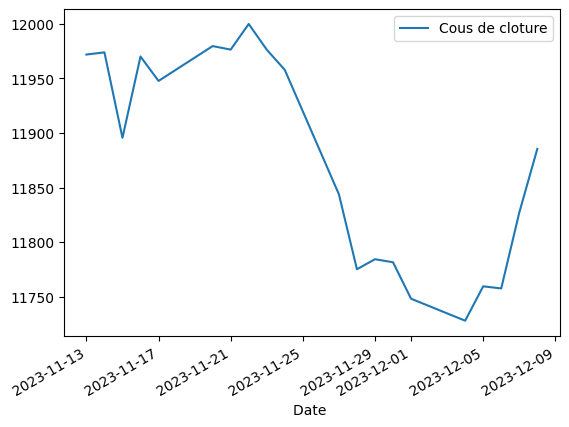

In [181]:
df.head(20).plot()

# Prediction

**Split Data**

In [182]:
train_size = int(len(df) * 0.80)
test_size = int(len(df) * 0.20)

df = df[::-1]

train = df[:-test_size]
test= df[-test_size:]

In [183]:
train

,Cous de cloture
Date,
2013-12-06,9240.41
2013-12-09,9221.40
2013-12-10,9241.40
2013-12-11,9252.30
2013-12-12,9320.66
...,...
2022-01-07,13477.25
2022-01-10,13486.31
2022-01-12,13531.26


In [184]:
test

,Cous de cloture
Date,
2022-01-17,13770.78
2022-01-18,13768.05
2022-01-19,13737.71
2022-01-20,13777.87
2022-01-21,13783.81
...,...
2023-12-04,11728.06
2023-12-05,11759.51
2023-12-06,11757.60


**Scale Data**

In [185]:
scaler=MinMaxScaler()
Train_Scalar=scaler.fit_transform(train)
Test_Scalar=scaler.fit_transform(test)

In [186]:
Train_Scalar

array([[0.08897151],
       [0.0851601 ],
       [0.08917   ],
       ...,
       [0.94926478],
       [0.96068898],
       [1.        ]])

In [187]:
Test_Scalar

array([[0.94835825],
       [0.94771942],
       [0.94061982],
       [0.95001732],
       [0.95140728],
       [0.9443147 ],
       [0.93492189],
       [0.93700918],
       [0.93971892],
       [0.9536069 ],
       [0.97473254],
       [0.96996359],
       [0.97988525],
       [0.98172918],
       [0.99014386],
       [0.99059315],
       [0.99863577],
       [0.99042701],
       [1.        ],
       [0.99031   ],
       [0.97074749],
       [0.9476422 ],
       [0.94589655],
       [0.94738012],
       [0.93571047],
       [0.92005111],
       [0.8899913 ],
       [0.80901514],
       [0.78461816],
       [0.78195522],
       [0.7363039 ],
       [0.7178178 ],
       [0.63121157],
       [0.69113229],
       [0.73666894],
       [0.66679849],
       [0.67999616],
       [0.68824237],
       [0.69889879],
       [0.71229303],
       [0.75290396],
       [0.73939974],
       [0.66922508],
       [0.66473226],
       [0.67507745],
       [0.6838057 ],
       [0.70279725],
       [0.709

In [188]:
X_train = Train_Scalar[:-1]
y_train = Train_Scalar[1:]

X_test = Test_Scalar[:-1]
y_test = Test_Scalar[1:]

In [189]:
X_train

array([[0.08897151],
       [0.0851601 ],
       [0.08917   ],
       ...,
       [0.94025254],
       [0.94926478],
       [0.96068898]])

# TRAINING MODEL


In [190]:
nn_model = Sequential()
nn_model.add(Dense(5, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1892/1892 [==============================] - 4s 2ms/step - loss: 0.0227
Epoch 2/100
1892/1892 [==============================] - 3s 2ms/step - loss: 0.0129
Epoch 3/100
1892/1892 [==============================] - 4s 2ms/step - loss: 0.0018
Epoch 4/100
1892/1892 [==============================] - 3s 2ms/step - loss: 4.6140e-04
Epoch 5/100
1892/1892 [==============================] - 4s 2ms/step - loss: 3.1165e-04
Epoch 6/100
1892/1892 [==============================] - 5s 3ms/step - loss: 2.9663e-04
Epoch 7/100
1892/1892 [==============================] - 3s 2ms/step - loss: 2.9854e-04
Epoch 8/100
1892/1892 [==============================] - 3s 2ms/step - loss: 3.0129e-04
Epoch 8: early stopping


In [191]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)

60/60 [==============================] - 0s 1ms/step


# Test de performance

**Calcule de performance**

In [192]:
print("The R score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.935
The R2 score on the Test set is:	0.928


**RMSE**

In [197]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_test_nn)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0034636541063309445


**Visualisation**

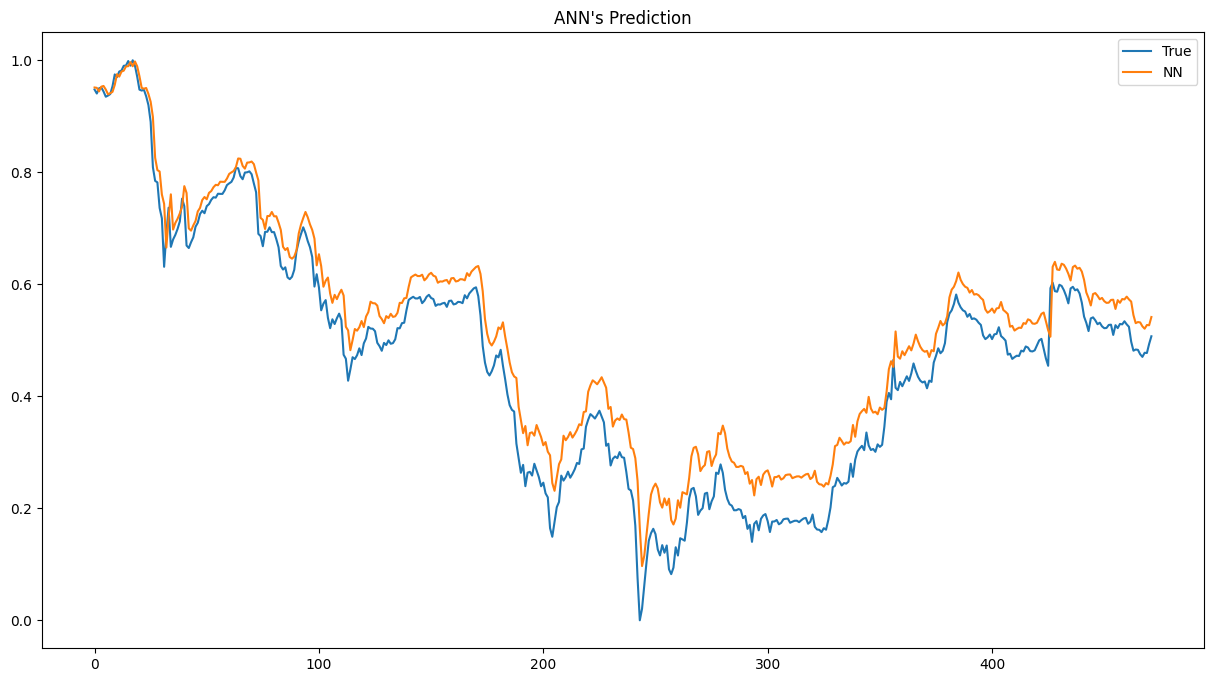

In [196]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.legend()
plt.show();